In [1]:
import pandas as pd 
import numpy as np
import scipy
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import seaborn as sns


In [3]:
df=pd.read_csv("clean_titanic_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.6+ KB


we can sus pect that female has higher chnace of survival over males 
null say that there no relation exist between male and survived (independance) proportion of male survived =proportion of female survived

we first begin with descriptive analytics and draw distribution of male alone, survived alone and then 2 together

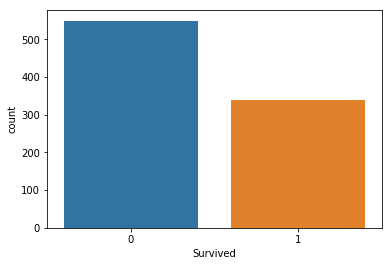

In [10]:
sns.countplot(x='Survived',data=df)


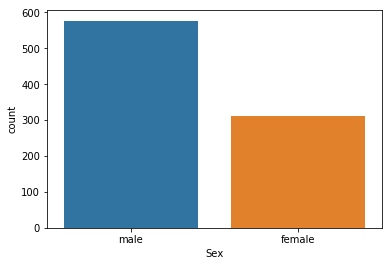

In [11]:
sns.countplot(x='Sex',data=df)

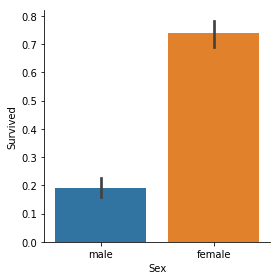

In [22]:
sns.factorplot(x='Sex',y='Survived',data=df,kind='bar')

we can see that there is difference in distribution in survived due to gender that females has higher percentages of survival
but this not enough to gegnralize

In [31]:
ct1=pd.crosstab(df['Survived'],df['Sex'])
col=ct1.sum(axis=0)
proportions=ct1/col
print(proportions)

Sex         female      male
Survived                    
0         0.259615  0.811092
1         0.740385  0.188908


In [33]:
cs2= scipy.stats.chi2_contingency(ct1)
print(cs2)

(258.4266104463763, 3.7799096665576e-58, 1, array([[192.67491564, 356.32508436],
       [119.32508436, 220.67491564]]))


We can see that the chi square is very large and p-vales is so small so we can reject null confidently and say that
There is an association between Sex and being survived that being female has higher chance of survival

We also can suspect that passengers of higher class has higher chance of survival

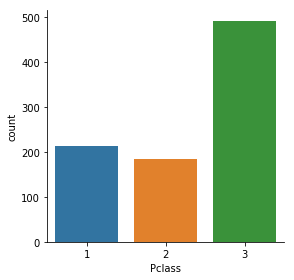

In [35]:
sns.factorplot(x='Pclass',data=df,kind='count')

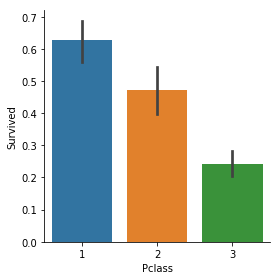

In [69]:
sns.factorplot(x='Pclass',y='Survived',data=df,kind='bar')

we see that passenger of class 1 has higher chance of survival over class 2 over class 3

In [39]:
ct2=pd.crosstab(df['Survived'],df['Pclass'])

proportions2=ct2/ct2.sum(axis=0)
print(proportions2)

Pclass           1         2         3
Survived                              
0         0.373832  0.527174  0.757637
1         0.626168  0.472826  0.242363


We can see that 
passengers of class one has higher chance of survival
passengers of class two still has big chance of survival but less than class 1 


In [40]:
cs3=scipy.stats.chi2_contingency(ct2)
print(cs3)

(100.98040726128336, 1.1813624785477922e-22, 2, array([[132.1552306, 113.6287964, 303.215973 ],
       [ 81.8447694,  70.3712036, 187.784027 ]]))


We can see that the chi square is very large and p-vales is so small so we can reject null confidently and say that
There is an association between class of passeneger and being survived that being from class 1 has highest chance of survival

In [45]:
df_male=df[df['Sex']=='male']
ct_male=pd.crosstab(df_male['Survived'],df_male['Pclass'])

proportions_male=ct_male/ct_male.sum(axis=0)
print(proportions_male)
cs_male=scipy.stats.chi2_contingency(ct_male)
print(cs_male)

Pclass           1         2         3
Survived                              
0         0.631148  0.842593  0.864553
1         0.368852  0.157407  0.135447
(32.954129468508505, 6.983959431184943e-08, 2, array([[ 98.95320624,  87.59792028, 281.44887348],
       [ 23.04679376,  20.40207972,  65.55112652]]))


We see that there it's same direction in relation that being male doesn' affect order of chnaces of survival between classes

In [47]:
df_female=df[df['Sex']=='female']
ct_female=pd.crosstab(df_female['Survived'],df_female['Pclass'])

proportions_female=ct_female/ct_female.sum(axis=0)
print(proportions_female)
cs_female=scipy.stats.chi2_contingency(ct_female)
print(cs_female)

Pclass           1         2    3
Survived                         
0         0.032609  0.078947  0.5
1         0.967391  0.921053  0.5
(80.86072889734217, 2.7625860763598433e-18, 2, array([[ 23.88461538,  19.73076923,  37.38461538],
       [ 68.11538462,  56.26923077, 106.61538462]]))


also female preserve order of survival between classes but there is something to note here 
a female passenger of class 1 almost have  100% of survival  0.97 
also being female from class 3 have equal chance of survival

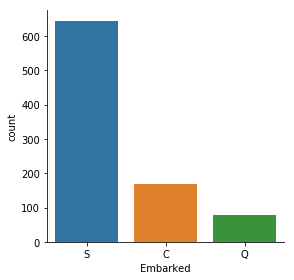

In [51]:
#Embarked and Pclass 
sns.factorplot(x='Embarked',data=df,kind='count')

In [50]:
ct_emb_class=pd.crosstab(df['Embarked'],df['Pclass'])

proportions_emb_class=ct_emb_class/ct_emb_class.sum(axis=0)
print(proportions_emb_class)
results=scipy.stats.chi2_contingency(ct_emb_class)
print(results)

Pclass           1         2         3
Embarked                              
C         0.397196  0.092391  0.134420
Q         0.009346  0.016304  0.146640
S         0.593458  0.891304  0.718941
(123.75190952951289, 8.435267819894384e-26, 4, array([[ 40.44094488,  34.77165354,  92.78740157],
       [ 18.53543307,  15.93700787,  42.52755906],
       [155.02362205, 133.29133858, 355.68503937]]))


analysis of association between age and survived 
we can suspect that people of older age have higher chance of survival

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

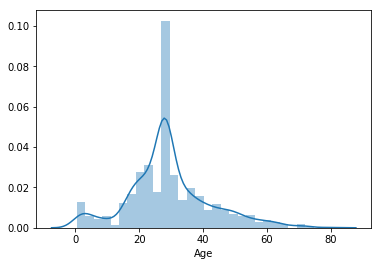

In [53]:
sns.distplot(df['Age'])
df['Age'].describe()

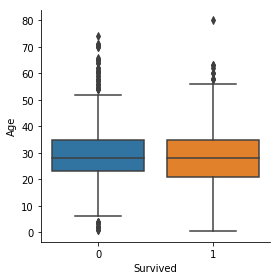

In [54]:
sns.factorplot(x='Survived',y='Age',data=df,kind='box')

from drawing there is a big overlapping between distribution of ages between survived and not survived 
so we can expect that there is no big difference between means 

In [56]:
model=smf.ols(formula='Age ~ C(Survived)',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.345
Date:                Sun, 28 Apr 2019   Prob (F-statistic):             0.0374
Time:                        14:25:59   Log-Likelihood:                -3538.0
No. Observations:                 889   AIC:                             7080.
Df Residuals:                     887   BIC:                             7090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.0282      0.553  

In [58]:
print(df.groupby('Survived')['Age'].mean())
print(df.groupby('Survived')['Age'].std())

Survived
0    30.028233
1    28.163735
Name: Age, dtype: float64
Survived
0    12.499986
1    13.672269
Name: Age, dtype: float64


In [63]:
scipy.stats.pearsonr(df['SibSp'],df['Parch'])

(0.4145416380997265, 3.0940341670178025e-38)

We can see that there's a staistically signifcant weak linear relation bertween SibSp and Parch

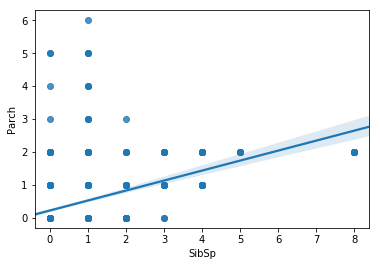

In [68]:
sns.regplot(y='Parch',x='SibSp',data=df)